In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns
import os
from pathlib import Path

In [2]:
# Define path to Scorecard data
df = pd.read_csv('../data/processed/reduced_scorecard.csv')

df['Year'] = df['Year'].str[:4].astype(int)

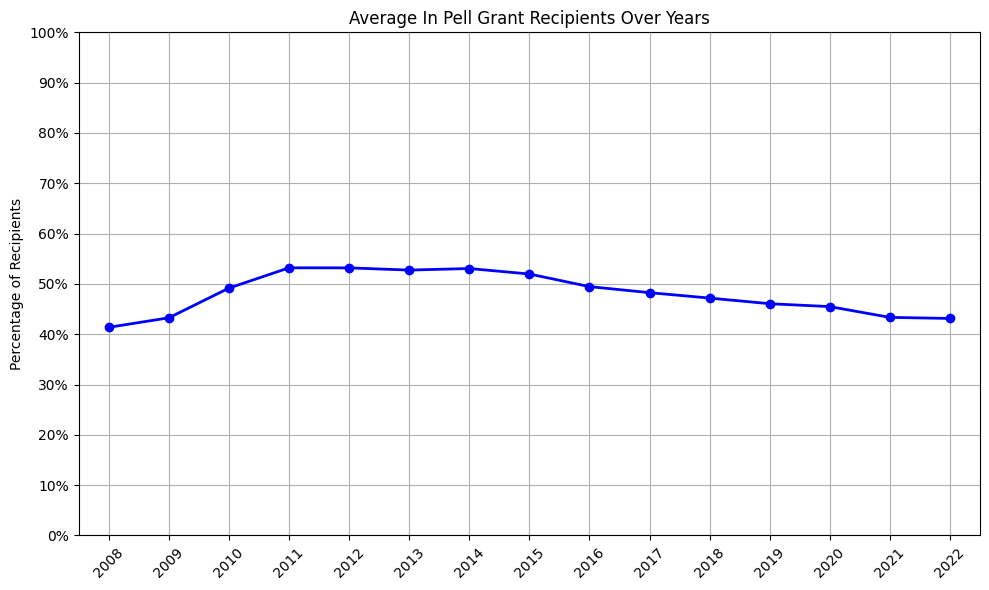

In [3]:
# Group by 'Year' and calculate the mean tuition for each year
pellgrant_by_year = df.groupby('Year')['PCTPELL'].mean()

#years = pellgrant_by_year.index.astype(int)

# Plotting
plt.figure(figsize=(10, 6))
#ax = pellgrant_by_year.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)
plt.plot(pellgrant_by_year.index, pellgrant_by_year.values, marker='o', color='b', linestyle='-', linewidth=2)
ax = plt.gca()

#y axis to be percentages
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
years_with_data = pellgrant_by_year.index

#x axis labels going from year when data starts
ax.set_xticks(years_with_data)
ax.set_xticklabels(years_with_data, rotation=45)
ax.set_xlim(2007.5, 2022.5)

#set y axis labels to go from 0 to 100, with 10 point increments
ax.set_yticks(np.arange(0,1.1, 0.1))
ax.set_ylim(0, 1)


plt.title("Average In Pell Grant Recipients Over Years")
plt.xlabel("")
plt.ylabel("Percentage of Recipients")
plt.grid(True)
plt.tight_layout()
plt.savefig('../visualizations/pellgrantpercent.png', dpi=300, bbox_inches='tight')
plt.show()